In [1]:
# --- Load Agents --- #
from agents.agent_reinforce.agent import REINFORCEAgent
from agents.agent_deepqn.agent import DeepQAgent
from agents.agent_ddpg.agent import DDPG_Agent

# --- Load Environments --- #
from environment.environment_loader import environment_loader

# --- Load Necessary --- #
from collections import deque
import numpy as np
from utilities.helper import flatten


# --- Load Training --- #
from experiments.experiment import Experiment

%load_ext autoreload
%autoreload 2


C:\Users\danie\anaconda3\envs\drlnd\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


# Experiments with config files

In [2]:
def choose_random(num_agent, grid_size, randomized, distribution):
    if not randomized: return []
    else: 
        new_distribution = distribution.copy()[:grid_size]
        np.random.shuffle(new_distribution)
        return new_distribution[:num_agent]

In [3]:
from experiments.experiment_list import exp_config_ddpg, exp_config_ppo, exp_config_dqn, possible_starts, possible_goals
from agents.agent_ddpg.config import DDPG_AgentConfig


In [4]:
ddpg_experiments = []
for i, config in enumerate(exp_config_ddpg[:1]):
    """
    order of config: num_agent, grid_size, agents_start, goals_start, prob_right_direction, actor_critic 
    init environment: num_agent = 2, grid_size = 8, prob_right_direction = 1, agents_start = [], goals_start=[], render_board = False
    init of ddpg: state_size, action_size, seed=1, config=DDPG_AgentConfig()
    """
    # agents_start = choose_random(config[0], config[1], config[2], possible_starts)
    # goals_start = choose_random(config[0], config[1], config[3], possible_goals)
    
    # --- Env --- #
    env = UnityEnvironment(file_name="Tennis_Windows_x86_64/Tennis.exe")
    environment_loader (file_name="Tennis_Windows_x86_64/Tennis.exe", no_graphics = True)

    # --- Agents --- #
    agent_config = DDPG_AgentConfig(ACTOR_H=config[5], CRITIC_H=config[5])
    agents = [DDPG_Agent(env.state_space, env.action_space.n, seed=1, config=agent_config) for _ in range(env.num_agent)]

    # --- Experiment --- #
    num_episodes = 30
    max_t = 75
    new_experiment = Experiment(name="DDPG Exp_{}__Agents_{}__Grid_{}__Agent fixed_{}__Goal fixed_{}__Stoch_{}".format(i, str(config[0]), str(config[1]), str(config[2]), str(config[3]), str(config[4])), environment= env, agents=agents, max_t=max_t, num_episodes=num_episodes, goal = 0., save_states_every=int(num_episodes/10))
    ddpg_experiments.append(new_experiment)

print(len(ddpg_experiments))

1


c:\Users\danie\Code\ai\udacity-nano\research company\multi-taxi-drl\agents\agent_ddpg\model.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.output_calc(x)


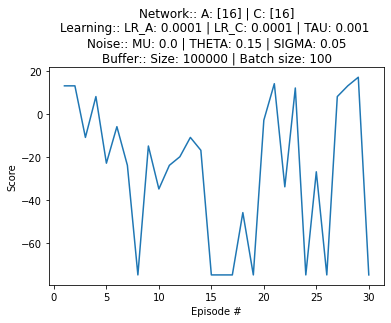

In [5]:
for experiment in ddpg_experiments:
    score_history, state_history = experiment.run()
    experiment.save(score_history, state_history, display = False)

# On one experiment

In [ ]:

env = GridEnv(num_agent = 2, grid_size = 5, agents_start = [(1,1),(2,3)], goals_start=[(1,3),(3,2)], prob_right_direction = 1, render_board = False)
agents = [DDPG_Agent(env.state_space, env.action_space.n, seed=1) for _ in range(env.num_agent)]
experiments = [Experiment(name="DDPG Exp {}".format(1), environment= env, agents=agents, max_t=30, num_episodes=1, goal = 0., save_states_every=10)]

In [ ]:
for experiment in experiments:
    score_history, state_history = experiment.run()
    experiment.save(score_history, state_history)